In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "./ttt.csv"
db = pd.read_csv(path, index_col=0)
db

,1,2,3,4,5,6,7,8,9,PlayerX,PlayerO,Winner,WinnerType
0,X,X,X,O,O,X,X,O,O,Bot,Bot,X,Bot
1,X,O,O,O,X,X,O,X,X,Bot,Bot,X,Bot
2,X,X,O,O,NaN,O,X,X,O,Bot,Bot,O,Bot
3,X,X,O,O,X,O,NaN,X,NaN,Bot,Bot,X,Bot
4,O,X,O,X,X,X,X,O,O,Bot,Bot,X,Bot
5,NaN,O,O,X,NaN,O,X,X,X,Bot,Bot,X,Bot
6,O,X,X,X,O,X,O,O,X,Bot,Bot,X,Bot
7,X,X,O,O,X,X,X,O,O,Bot,Bot,D,NaN
8,X,NaN,O,X,O,X,O,NaN,NaN,Bot,Bot,O,Bot
9,X,X,X,NaN,NaN,O,NaN,O,NaN,Bot,Bot,X,Bot


In [3]:
hVb = db[((db['PlayerX'] == 'Human') | (db['PlayerO'] == 'Human')) 
         & ((db['PlayerX'] == 'Bot') | (db['PlayerO'] == 'Bot'))] # games with humans and bots
nHWins = len(hVb[hVb['WinnerType'] == 'Human'])
nBWins = len(hVb[hVb['WinnerType'] == 'Bot'])
nDWins = hVb['WinnerType'].isnull().sum()
hWinPercent = (nHWins / len(hVb)) * 100
print(f"Hunans win against bots {hWinPercent}% of the time")

Hunans win against bots 75.0% of the time


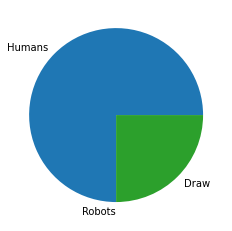

In [4]:
labels = ('Humans', 'Robots', 'Draw')
wins = (nHWins, nBWins, nDWins)
fig, ax = plt.subplots()
ax.pie(wins, labels=labels)
plt.show()

In [5]:
finished_games = db[db['WinnerType'].notna()]
nNulls = finished_games[['1', '2', '3', '4', '5', '6', '7', '8', '9']].isnull().sum().sum()
avgMoves = round((len(finished_games) * 9 - nNulls) / len(finished_games))
print(f"The average game takes {avgMoves} moves")

The average game takes 7 moves


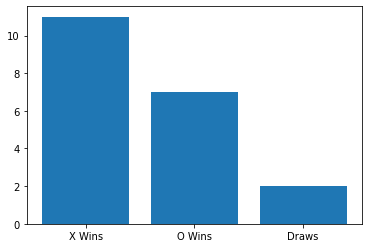

In [6]:
nXWins = len(db[db['Winner'] == 'X'])
nOWins = len(db[db['Winner'] == 'O'])
nDWins = len(db[db['Winner'] == 'D'])
y = [nXWins, nOWins, nDWins]
x = ['X Wins', 'O Wins', 'Draws']
fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()

The least common move position is 3.
The most common move position is 4.


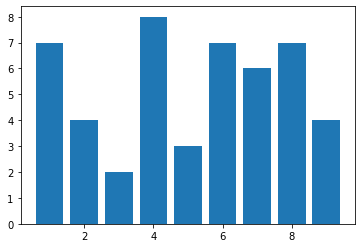

In [28]:
spotFreq = list(9 - finished_games[['1', '2', '3', '4', '5', '6', '7', '8', '9']].isnull().sum())
leastCommon = spotFreq.index(min(spotFreq)) + 1 
mostCommon = spotFreq.index(max(spotFreq)) + 1 
print(f'The least common move position is {leastCommon}.')
print(f'The most common move position is {mostCommon}.')
y = spotFreq
x = list(range(1,10))
fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()